# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
btc_url_json = btc_url + "?format=json"

eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
eth_url_json = eth_url + "?format=json"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url_json).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url_json).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $52410.00
The current value of your 5.3 ETH is $7166.50


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
base_url = 'https://paper-api.alpaca.markets'

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-02-26", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio.head(10)

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-02-26 00:00:00-05:00  114.96  115.39  114.5915  115.37  9735524  384.35   

                                                              
                             high     low   close     volume  
time                                                          
2021-02-26 00:00:00-05:00  385.58  378.23  380.32  134902084

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio['AGG']['close'][0]
spy_close_price = df_portfolio['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.37
Current SPY closing price: $380.32


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19016.00
The current value of your 200 AGG shares is $23074.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

#calculate total values by asset class
crypto_value = my_btc_value + my_eth_value
shares_value = my_spy_value + my_agg_value

# Set value data for savings dataframe
savings_data = {
    "amount": [crypto_value, shares_value]
}

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, index = ['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,59576.501
shares,42090.000


<AxesSubplot:title={'center':'My_Savings'}, ylabel='amount'>

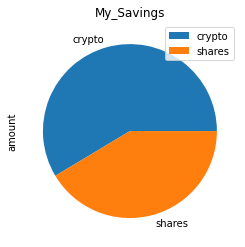

In [22]:
# Plot savings pie chart
df_savings.plot.pie(y='amount' ,title="My_Savings")

In [35]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings_value = crypto_value + shares_value

# Create function to validate saving health
def validate_savings(emergency_fund, savings_value):
    if savings_value > emergency_fund:
        print("Congragulations! You have enough money in your emergency fund.")
    elif savings_value == emergency_fund:
        print("Congragulations! You have now reached your emergency fund goal")
    else: 
        needed_value = emergency_fund - savings_value
        print(f"You need ${needed_value} USD to reach your emergency fund goal.")

# Validate savings
validate_savings(emergency_fund, savings_value)

Congragulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [44]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [71]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_5yr_historical = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_5yr_historical.sort_index()

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705   1814107   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490   2961016   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650   1647564   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690   2197732   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660   2071970   
...                           ...       ...       ...      ...       ...   
2020-08-03 00:00:00-04:00  119.37  119.4000  119.1903  119.400  24615464   
2020-08-04 00:00:00-04:00  119.42  119.6300  119.4200  119.630  21512268   
2020-08-05 00:00:00-04:00  119.39  119.4900  119.3100  119.400  34239733   
2020-08-06 00:00:00-04:00  119.62  119.7300  119.5300  119.580   9021388   
2020-08-07 00:00:00-04:00  119.66  119.7300  119.3950  119.445   8830420   

                                SPY                                    
                               open    high     low   close    volume  
time                                                                   
2016-08-18 00:00:00-04:00  218.3300  218.90  218.21  218.87  42850145  
2016-08-19 00:00:00-04:00  218.3100  218.75  217.74  218.57  52238224  
2016-08-22 00:00:00-04:00  218.2700  218.80  217.83  218.50  48628907  
2016-08-23 00:00:00-04:00  219.2500  219.60  218.90  218.94  41981207  
2016-08-24 00:00:00-04:00  218.8200  218.91  217.36  217.88  50310103  
...                             ...     ...     ...     ...       ...  
2020-08-03 00:00:00-04:00  328.3200  329.62  327.73  328.76  89861354  
2020-08-04 00:00:00-04:00  327.8600  330.06  327.86  330.03  73684427  
2020-08-05 00:00:00-04:00  331.4700  332.39  331.18  332.06  72941562  
2020-08-06 00:00:00-04:00  331.4799  334.46  331.13  334.31  76988181  
2020-08-07 00:00:00-04:00  333.2800  334.88  332.30  334.55  98710236  

[1000 rows x 10 columns]

In [74]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500

# Set portfolio weights
portfolio_weights = [0.40, 0.60]

# ?MCSimulation
MC_30yr = MCSimulation(
    portfolio_data = df_5yr_historical,
    weights = portfolio_weights,
    num_simulation = num_sims,
    num_trading_days = 252 * 30
)

In [76]:
# Printing the simulation input data
MC_30yr.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660  2071970   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-18 00:00:00-04:00          NaN  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   
2016-08-24 00:00:00-04:00    -0.000266  218.82  218.91  217.36  217.88   

                                                  
                             volume daily_return  
time                                              
2016-08-18 00:00:00-04:00  42850145          NaN  
2016-08-19 00:00:00-04:00  52238224    -0.001371  
2016-08-22 00:00:00-04:00  48628907    -0.000320  
2016-08-23 00:00:00-04:00  41981207     0.002014  
2016-08-24 00:00:00-04:00  50310103    -0.004842

In [77]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001306,0.986861,0.999125,0.991316,1.000671,0.998489,1.007116,0.993708,1.010448,1.004731,...,1.004762,1.003191,0.988240,0.998950,0.996043,0.995825,0.990364,1.000864,1.002770,1.005115
2,0.998874,0.989343,1.002218,0.986459,0.995194,0.995645,1.012919,0.994099,1.016013,1.010396,...,1.001148,1.001369,0.986013,1.003945,0.994765,0.997137,0.996539,0.999257,0.997738,0.993857
3,0.998184,0.978720,1.008085,0.985587,0.993024,0.997345,1.014434,1.005798,1.027983,1.016539,...,0.993376,1.012459,0.989745,1.005416,0.995032,1.001976,1.002418,1.020410,0.998538,0.991330
4,0.998943,0.985182,1.006389,0.983535,0.974994,0.987411,1.015978,1.000013,1.014480,1.015916,...,0.996313,1.021759,0.988000,1.004676,0.998249,1.009173,0.992972,1.034954,0.994064,0.987631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,18.408823,4.719792,36.554100,5.408011,6.006786,12.540804,8.910303,4.156578,6.550868,10.439681,...,6.216932,6.794251,15.774146,6.544273,18.184262,8.222078,22.534035,25.475808,9.050502,7.560361
7557,18.222334,4.680171,36.429833,5.450556,5.997602,12.500721,8.889334,4.163343,6.524432,10.557283,...,6.237511,6.797287,15.778684,6.458065,18.296757,8.260632,22.800283,25.808611,8.973768,7.506317
7558,18.135590,4.670304,36.440679,5.462921,6.050242,12.607758,8.990274,4.168659,6.643990,10.478390,...,6.223172,6.818582,15.725879,6.402359,18.173804,8.145230,23.010591,26.081974,8.979769,7.524821
7559,18.104735,4.685902,36.195130,5.448911,6.023053,12.521559,8.943493,4.148039,6.762316,10.499988,...,6.196242,6.803943,15.783039,6.418584,17.855939,8.143436,22.986998,26.291829,8.931146,7.561482


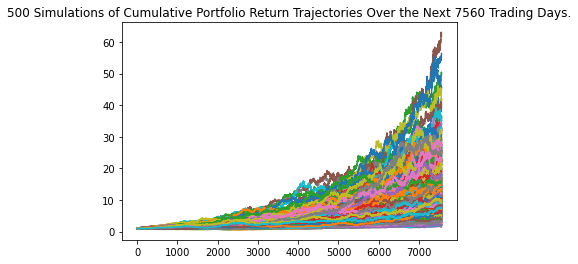

In [78]:
# Plot simulation outcomes
line_plot = MC_30yr.plot_simulation()

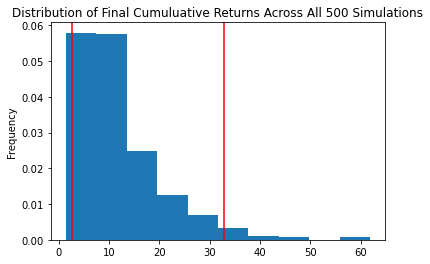

In [79]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30yr.plot_distribution()

### Retirement Analysis

In [80]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30yr.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             11.857795
std               8.430351
min               1.437145
25%               5.992479
50%               9.610973
75%              14.994957
max              61.865810
95% CI Lower      2.619124
95% CI Upper     32.854574
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [81]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $52382.48 and $657091.48


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [82]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $78573.72 and $985637.21


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [83]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Set number of simulations
num_sims = 500

# Set portfolio weights
portfolio_weights = [0.30, 0.70]

# ?MCSimulation
MC_5yr = MCSimulation(
    portfolio_data = df_5yr_historical,
    weights = portfolio_weights,
    num_simulation = num_sims,
    num_trading_days = 252 * 5
)

In [84]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000790,1.000024,0.998159,1.000017,0.996110,0.995969,0.996553,1.003124,1.014083,0.990427,...,0.996638,1.011858,1.010580,0.996392,1.003881,0.997185,0.981596,1.028611,1.012729,0.999117
2,0.995073,0.979732,0.999042,1.002635,0.990333,1.005167,1.003478,1.011072,1.026872,0.992316,...,0.995599,1.023411,1.005797,0.997559,1.013606,1.011946,0.977898,1.030186,1.023883,1.019737
3,0.999217,0.983518,1.005893,0.988160,0.997097,1.004442,0.998409,1.010628,1.029638,0.988395,...,0.996031,1.016107,1.012885,1.011627,1.016358,1.013573,0.972341,1.028517,1.030904,1.029161
4,1.001916,0.992271,0.997962,0.968176,1.008757,1.005433,1.021249,1.014852,1.038624,0.991875,...,0.983828,1.020525,1.033800,1.008942,1.028369,1.000413,0.983185,1.027662,1.048363,1.036243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.477040,2.299665,1.035025,3.304976,1.233180,1.064308,1.807584,1.441053,2.413912,1.307808,...,1.533578,2.032998,1.116600,1.969556,1.808012,0.619674,0.916065,2.132495,1.534882,1.053789
1257,1.491096,2.309009,1.049532,3.286000,1.247234,1.074746,1.799297,1.445538,2.432532,1.329735,...,1.516921,2.028715,1.115835,1.972389,1.768871,0.621430,0.920895,2.161047,1.530519,1.042496
1258,1.498921,2.314904,1.057433,3.260339,1.246619,1.078430,1.793014,1.431068,2.445168,1.331257,...,1.511748,2.026929,1.131493,2.007482,1.790047,0.627346,0.914922,2.155127,1.525347,1.038809
1259,1.491525,2.348231,1.059351,3.254674,1.261620,1.086141,1.779753,1.436516,2.455882,1.342055,...,1.507537,2.046198,1.144328,2.015484,1.779424,0.632497,0.914670,2.143702,1.536650,1.035186


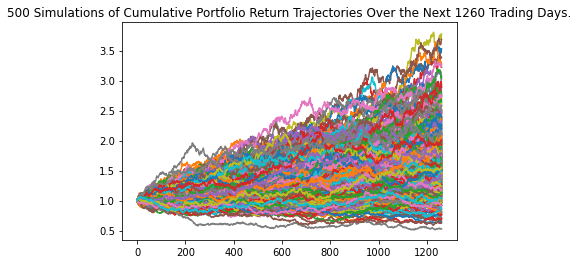

In [85]:
# Plot simulation outcomes
line_plot_five = MC_5yr.plot_simulation()

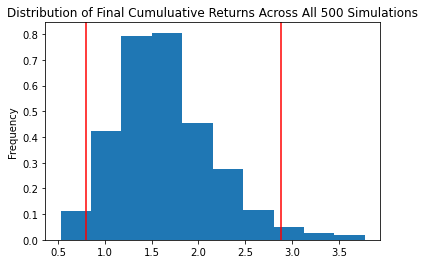

In [86]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_5yr.plot_distribution()

In [87]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_5yr.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.647095
std               0.523545
min               0.527731
25%               1.270838
50%               1.577418
75%               1.930996
max               3.778396
95% CI Lower      0.804721
95% CI Upper      2.883550
Name: 1260, dtype: float64


In [89]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $52382.48 and $657091.48


### Ten Years Retirement Option

In [90]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Set number of simulations
num_sims = 500

# Set portfolio weights
portfolio_weights = [0.40, 0.60]

# ?MCSimulation
MC_10yr = MCSimulation(
    portfolio_data = df_5yr_historical,
    weights = portfolio_weights,
    num_simulation = num_sims,
    num_trading_days = 252 * 5
)

In [91]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008258,0.986732,0.989299,0.992994,0.990483,1.001434,1.001820,1.012885,0.995674,1.012992,...,1.001145,0.999282,1.008290,1.000974,1.001385,1.002486,0.988743,1.001191,1.009785,1.001674
2,1.010938,0.991726,0.985688,0.997915,0.995495,1.002670,1.014321,1.026504,0.995085,1.015755,...,1.005871,0.998368,1.016999,0.986432,1.007760,1.014664,1.000947,0.996544,1.004676,0.998931
3,1.012106,1.000766,0.992314,0.989506,1.012730,1.000514,1.017519,1.020370,0.994589,1.025175,...,1.014204,0.995515,1.016015,0.981242,1.009625,1.017082,0.994755,0.995845,1.008957,1.006662
4,1.013693,0.998095,0.993771,0.981606,1.000758,0.992777,1.014710,1.043971,1.006228,1.033006,...,1.011399,0.990039,1.018995,0.985707,1.008438,1.012658,0.999862,0.995075,1.003590,1.018831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.279796,1.526134,1.237425,1.112207,1.008975,1.191323,1.364862,1.912066,1.150974,1.292892,...,1.504495,2.796679,1.750650,1.264674,1.190635,1.974265,2.534843,2.225058,1.414099,1.820620
1257,1.269637,1.540954,1.236829,1.113839,1.013408,1.196154,1.359424,1.899505,1.152754,1.301675,...,1.504514,2.797661,1.748305,1.257703,1.190835,1.937855,2.507154,2.205579,1.422025,1.822410
1258,1.277364,1.523987,1.243664,1.112017,1.003685,1.203248,1.341564,1.887198,1.145813,1.294539,...,1.510332,2.800705,1.742414,1.247297,1.182351,1.931202,2.489004,2.175397,1.425321,1.808753
1259,1.279431,1.513210,1.243736,1.104172,1.000730,1.190635,1.345348,1.884075,1.150408,1.292545,...,1.516561,2.796340,1.757601,1.250370,1.188211,1.923086,2.494189,2.177028,1.436652,1.796864


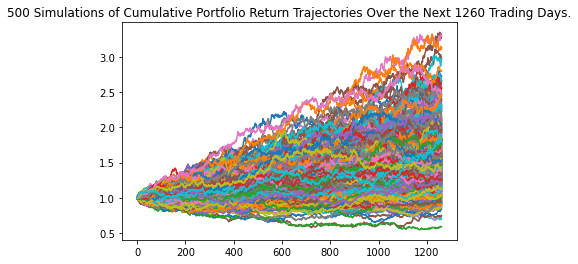

In [92]:
# Plot simulation outcomes
line_plot_ten = MC_10yr.plot_simulation()

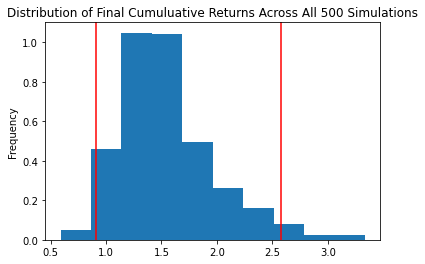

In [93]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_10yr.plot_distribution()

In [94]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_10yr.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              1.543919
std               0.427287
min               0.589214
25%               1.258311
50%               1.478752
75%               1.753858
max               3.334574
95% CI Lower      0.905309
95% CI Upper      2.580183
Name: 1260, dtype: float64


In [95]:
# Set initial investment
initial_investment = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 10 years will end within in the range of $78573.72 and $985637.21
